<a href="https://colab.research.google.com/github/jsameijeiras/applied_ecomics_assigment/blob/main/Assigment_Jose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
NAME = "Wealth inequality and information"
COLLABORATORS = "Jose Ramón Sánchez Ameijeiras"

---

# Python assignment

|Name|SNR|ANR|
|----|---|----|
|Jose S. Ameijeiras|2065758|u205461|




# Research question (0.5 points)


- How does the asymmetric information affect the distribution of wealth?

# Motivation (0.5 points)

In 1970, Akerloff published the well-known proposal of the disappearing of markets under asymmetric information. Under certain conditions, among which are market-clearing, asymmetric information and rationality of the individuals, Akerlof shows that some markets disappear given that agents are not able to differentiate between high quality and low-quality goods. Due to their inability to differentiate, agents have negative expected returns in the case of trade and rationally decide not to trade, ending up in sub-optimal equilibrium.

On parallel to Akerfof, Thomas Schelling would published his Dynamic Models of Segregation, which is considered one of the first agent based modelling in concept. Later on, with the development of technology this models where feasible in computers. This models allow for the possibility of simulating reality out of simple rules that we provide to the agents. Indeed, the idea is to create a model where we provide to the agents with a certain policy or behaviour and they act with the enviourement given.

Agent Based Modelling has several advantages in contrast to the traditional modelling we have in economics, first of all is not deterministic since it is not equilibrium focused, thus it looks for understanding the dynamics. This is possible because the simulations created with the ABMs, allows us to spot the dynamics in every step of the simulation. 

Thus, the project proposal is to build a ABM to study the effect of information in a given market. Since the traditional adverse selection problem is the Akerlof market for lemons, inspiration has been taken from its model. However, the main focus here would be to understand the effect of information in inequality and the dynamics behind.


# Method (0.5 points)

As stated before the model is an agent based model where agents are either buyers or sellers of second hand cars. It starts with initial values, among which is the velocity of the spread of the news, the amount of money in the wallet, the proportions of buyers and the proportion of goods. The agents are positioned in a board similar to a chess board, where they move randomly and interact with each other in case of being in the same cell. At every step of the simulation agents interact among themselves according to a given rules.

## 1. The agents
In this simplified economy, sellers are willing to sell if they have a car if the price is bigger or equal than 1 monetary unit. Buyers are willing to buy always. However their bid depends on the fact that they have information or not. If they are informed they take the rational decision of paying to the seller 1 monetary unit for buying the car and they only buy a car of high quality. When buyers do not have information then they need to guess the price and give a random bid, between 0 and their maximum monetary value. This can be interpreted as they are always willing to buy but their bid will be more likely to win as they are richer. 

In addition to this, agents can be cooperative or not cooperative. Cooperative agents share information with their peers. The opposite is true for non cooperative, who just keep the information for themselves.

## 2. The information
The information is a binary variable, agents know or do not know. It can be understand as the capacity of differienting a high quality from a low quality car. In the first step of the model two random agents are provided with information and in every step they provide with information to their neighbour agents. Once the agent acquires the knowledge it cannot loose and it can transfer to others.

## 3. The goods

The good traded in this economy are cars, they can be high quality or low quality cars, also known as lemons. High quality cars have a monetary value of 1 while low quality cars have a monetary value of 0.

## 4. Utility.

Utility of buyers is:

$U_b = M + \frac{3}{2} CarValue$

Utility of sellers is:

$U_b = M + CarValue$

Where,

$M$ = Monetary units in the wallet

Thus, we create a board where agents interact randomly with each other and provide each other with the opportunity of selling or buying a car. While the trading is happening the information about the lemons is spread reaching a point where everyone is able to understand what car is a lemon and which is not. As a result, we can analyse data resulting from the simulation.


# Preview of the answers (0.5 points)

Summarize the results that you find and the answer to your research question.

As a result of this model and after 20 iterations for 10 different values on the proportion of cooperative individuals with 200 steps per iteration we observe that inequality between uninformed groups  informed groups do not differ that much. However as more individuals cooperate the gini coefficient increases until reaching its maximum when half of the population cooperate, after that we observe how it decreases until reaching the point where there are no cooperative agents. 

This is understandable since, in the first scenario the agents are behaving completly irrational and thus the wealth is redistributed out of random behaviour. However when a few have information they get advantage and increase their welfare. As the ones having this information increases the society reaches a lower gini index.


# Main assumptions (0.5 points)

- Agents are rational in their behaviour when they have information and behave randomly when they do not.
- Information is fully and without cost transferable.
- Sellers are willing to sell in case of possessing a car
- Buyers are willing to buy if they do not have a car.


# Python code (6.5 points)


Give the python code in code cells and use markdown cells to explain why you code things in this way and what the outcomes are of the code cells.

Note that the explanation of your code is at least as important as the python code itself.

Create as many python and markdown cells as you need to explain things well.


For creating the model described above the Mesa package is used. Mesa is an open source pacakage that allows to create agent based models with python. In addition to it, the libaries numpy, pandas and matplotlib are loaded since they will be used afterwords. Also the native packages of random and sys will be used. 

In [ ]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.datacollection import DataCollector
from mesa.space import MultiGrid
from mesa.batchrunner import BatchRunner

import random
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

One important part of the Mesa package is that it requires us to create classes with the Agent and the Model. In the next lines, the agent is created, with it, the initial variables are created as well as the functions that will describe the behaviour of the agent. The functions are defined here:
 
- The function *spread_news*: describes the way the knowledge is spread the agents looks for the squares around himself looking for other agents if he finds more than one it chooses one and with a 30% chance the receiver stores the knowledge.
- The function *do_business*: describes the logic of the agents when trading. It can be read as if agent A is a buyer and the agent he meets in your cell is a seller then two option are possible:
  - First option, the agent has information then it just exchanges money for a high-quality car, his empty object self.car is transferred to the other agent, a monetary unit is substracted from him and it is added to the other agent. 
  - Second option, the agent does not have information and thus it chooses to bid a random number (self.random.randint) between 0 and the money in his wallet. If the bid is larger than one monetary unit, the price of the car, then the seller accepts, however, the car can be a lemon or not.
- The function *move*: defines the way in which the agent’s move through the board. In this case is random.
- The function *calculate_utility*: allows to calculate the utility of the agents given if they are seller, type == 0 or buyers type == 1
- The function *step*: is basic for the correct behaviour of the package Mesa and it describes the order of the steps and when are they applicable. In here, it is described the differences between cooperative and non-cooperative agents. If the infotype==1 then apply the function, *spread_news*


In [ ]:
class Agent(Agent):
    
    def __init__(self, unique_id, model, information_share_type, initial_buyers_sellers):
        super().__init__(unique_id, model)
        self.knowledge = 0
        self.utility = 0
        self.wallet = self.random.randint(1, 10) #Amount in the wallet
        self.infotype = information_share_type #Cooperative vs non cooperative
        self.type = initial_buyers_sellers # Amount of buyers vs sellers
        self.speed_spread = 0.3 #self.random.randint(0, 1)
        if random.random() <0.5:
            self.car = self.random.randint(0, 1)
        else:
            self.car = None
            
    def spread_news(self):
        """ Knowledge is spread as a virus, the people around
        yourself is likely to tell you about it. You acquire it 
        or not, and that is likely in 30% of the cases. When you have
        knowledge that changes your behaviour because you are able 
        to indentify proper opportunities, and you behave as a rational
        agent, knowing exactly the value of the good in front of you. 
        When this is not the case, you behave irrationally according to 
        the economic standards since you just make a bet on the car or 
        not."""
        if self.knowledge == 0:
            return
        neighbors = self.model.grid.get_neighbors(self.pos,moore = False,
                                                  include_center=True)
        neig_agents = [a for n in neighbors for a in self.model.grid.get_cell_list_contents(n.pos)]
        for a in neig_agents:
            if self.random.random()<self.speed_spread:
                a.knowledge = 1
                 
    def do_business(self):
        cellmates = self.model.grid.get_cell_list_contents([self.pos])
        if len(cellmates) > 1:
            other = self.random.choice(cellmates)
             #Willing to trade and the other has a car
            if self.type == 1 and other.car is not None:
                '''When the type of agent gets better from having a car
                and the other guy is willing to sell, there is opportunity
                to sell'''
                #Willing to sell and the agent doesn't have a car
                if other.type == 0 and self.car: 
                    if self.knowledge == 1:
                        if other.car == 1:
                            self.wallet -= 1
                            old_car = self.car
                            self.car = other.car
                            other.wallet += 1
                            other.car = old_car
                    else:
                        bid = self.random.randint(0, self.wallet)
                        if bid >= 1 and bid < self.wallet:
                            self.wallet -= bid
                            old_car = self.car
                            self.car = other.car
                            other.wallet += bid
                            other.car = old_car
                        return
                        
                    
    def move(self):
        possible_steps = self.model.grid.get_neighborhood(
            self.pos,
            moore=True,
            include_center=False)
        new_position = self.random.choice(possible_steps)
        self.model.grid.move_agent(self, new_position)
        
    def calculate_utility(self):
        """ Different agents have different utilities if 
        they want cars they multiply the value of the car by 
        3/2 if not they just account for the amount of money they
        can sell it. If the car is a lemon they receive 0 valuation, 
        thus 0 utility from it."""
        if self.type == 1: 
            self.utility = self.wallet + 1.5*self.car if self.car is not None else self.wallet
        elif self.type == 0:
            self.utility = self.wallet + 1*self.car if self.car is not None else self.wallet    
        
    def step(self):
        self.move()      
        if self.wallet > 0:
            self.do_business()

        if self.infotype == 1:
            self.spread_news()
            
        self.calculate_utility()
        

In the next chunk of code is defined as an essential piece of the simulation which is the class news model. This is the engine of the simulation, in there we the initial variables are defined, which are N the number of agents, the size of the board where the agents interact and the creation of the agents.
 
Notice that the creation of the agents add two conditions; the number of buyers and the quantity of cooperative individuals. In addition to this, and taking advantage of the Mesa package, the data collector is used. This function allows us to determine the metrics that we want to measure in an individual and aggregated level. 
 
The functions that we have previously to the definition of the class *News_Model* are the ones needed to compute the different metrics that we want to measure in every step:
 - The Gini coefficient,
 - The utility understood as the aggregated utility
 - The wealth as the sum of the monetary units in every agent’s wallet.
 - The number of proper cars
 - The number of lemons
 - The number of informed agents.

In [ ]:
#let's define a function which is able to count, at each step, how #many agents are aware of the product
def compute_informed(model):
    return  sum([1 for a in model.schedule.agents if a.knowledge == 1])

def compute_lemons(model):
    return  sum([1 for a in model.schedule.agents if a.car == 0])

def compute_cars(model):
    return  sum([1 for a in model.schedule.agents if a.car == 1])


def compute_wealth(model):
    return  sum([a.wallet for a in model.schedule.agents])

def compute_utility(model):
    return sum([a.utility for a in model.schedule.agents])

def compute_gini(model):
    '''This is a formula that I extracted from the mesa documentation'''
    agent_wealths = [agent.wallet for agent in model.schedule.agents]
    x = sorted(agent_wealths)
    N = model.num_agents
    B = sum( xi * (N-i) for i,xi in enumerate(x) ) / (N*sum(x))
    return (1 + (1/N) - 2*B)

class News_Model(Model):
    def __init__(self, N, width, height, cooperative, buyers_proportion):
        self.num_agents = N
        self.grid = MultiGrid(width, height, True)
        self.schedule = RandomActivation(self)
        self.running = True
        self.cooperative = cooperative
        self.buyers_proportion = buyers_proportion
        #self.speed_spread = speed_spread
        #self.initial_wallet = initial_wallet


        # Create agents
        for i in range(self.num_agents):
            if self.random.random() < self.buyers_proportion:
                information_share_type = 1
            else:
                information_share_type = 0

            if self.random.random() < self.cooperative:
                initial_buyers_sellers = 1
            else:
                initial_buyers_sellers = 0
        
            #initial_wallet = self.initial_wallet
            #speed_spread = self.speed_spread 
            a = Agent(i, self, information_share_type, initial_buyers_sellers)
            self.schedule.add(a)
            x = self.random.randrange(self.grid.width)
            y = self.random.randrange(self.grid.height)
            self.grid.place_agent(a, (x, y))
            #Two random agents are initially informed
            l = [self.random.randint(0, N),self.random.randint(0, N)]
            if i in l: #only one agent is informed
                a.knowledge = 1
        
        #Create metrics for further analysis
        self.datacollector = DataCollector(
            model_reporters = {"Informed Agents": compute_informed,
                              "Gini": compute_gini,
                              "Wealth": compute_wealth,
                              "Utility": compute_utility,
                              "Lemons": compute_lemons,
                              "Cars": compute_cars},
            agent_reporters={"Knowledge": "knowledge",
                             "Utility": "utility",
                             "Car Type": "car",
                             "Agent type": "type",
                             "Wealth": "wallet"})
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()

For a first observation of the model and its behaviour one simulation with 365 iterations is run.

In [ ]:
model = News_Model(50, 10, 10,  cooperative = 0.9, buyers_proportion = 0.5)
for i in range(365):
    model.step()

As a result we have gather information described above and we had it store it in a pandas dataframe.

In [ ]:
model.datacollector.get_agent_vars_dataframe()

Knowledge  Utility  Car Type  Agent type  Wealth
Step AgentID                                                  
0    0                0      0.0       0.0           0       6
     1                0      0.0       1.0           1       8
     2                0      0.0       NaN           1       6
     3                0      0.0       NaN           1       6
     4                0      0.0       NaN           1       5
...                 ...      ...       ...         ...     ...
364  45               1      6.0       NaN           1       6
     46               1      6.0       NaN           0       6
     47               1      9.0       NaN           1       9
     48               1      9.0       0.0           1       9
     49               1      4.5       1.0           1       3

[18250 rows x 5 columns]

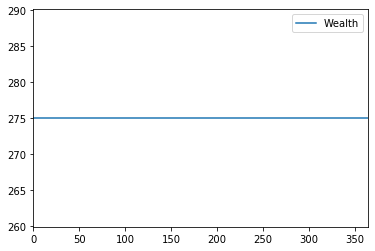

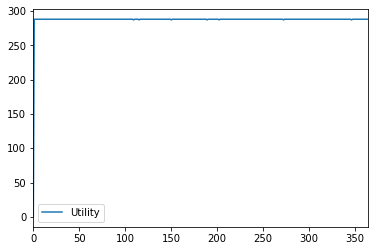

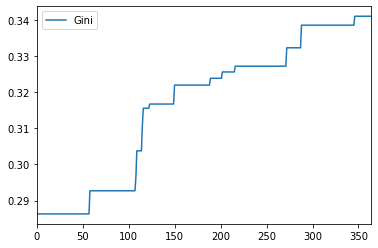

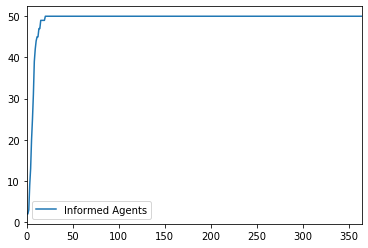

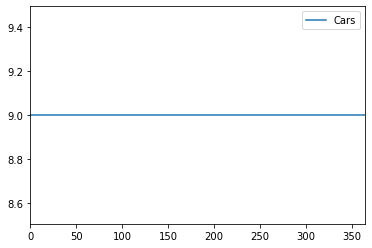

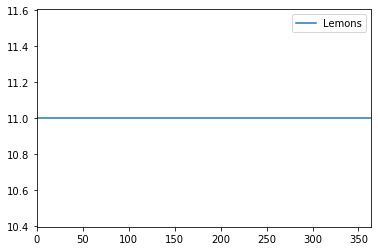

In [ ]:
gini = model.datacollector.get_model_vars_dataframe()[["Gini"]]
wealth = model.datacollector.get_model_vars_dataframe()[["Wealth"]]
utility = model.datacollector.get_model_vars_dataframe()[["Utility"]]
Total_Informed = model.datacollector.get_model_vars_dataframe()[["Informed Agents"]]
cars = model.datacollector.get_model_vars_dataframe()[["Cars"]]
lemons = model.datacollector.get_model_vars_dataframe()[["Lemons"]]
wealth.plot()
utility.plot()
gini.plot()
Total_Informed.plot()
cars.plot()
lemons.plot()

These graphs start to show us that the information is spread subsequently fast, in just 40 iterations we reach the maximum, but the Gini coefficient grows as well with it. Additionally, we see that the number of proper cars and lemons are constant, as designed, and the wealth varies a bit after the first iterations but the monetary amount in the market is also constant as designed. Notice we are in a zero-sum game. 
 
Also, we can analyse where are the agents positioned in the map, and how is the wealth distribution in the map.

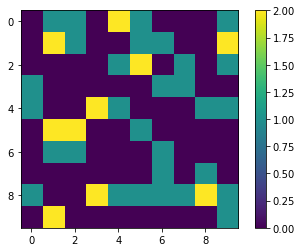

In [ ]:
'''Code from the Mesa Documentation'''
agent_counts = np.zeros((model.grid.width, model.grid.height))
for cell in model.grid.coord_iter():
    cell_content, x, y = cell
    agent_count = len(cell_content)
    agent_counts[x][y] = agent_count
plt.imshow(agent_counts, interpolation='nearest')
plt.colorbar()

# Running multiple batches
 
One of the most interesting possibilities of simulation and especially of the Mesa package is to run several different simulations one after the other varying the metrics of study. This is done like this, creating two dictionaries with the fixed parameters and the variable ones. In our case, we want to check for how the cooperative individuals affect and their share of information affect the wealth distribution and aggregated utility. Also, we want to check that varying the buyer’s proportion does not affect as a part of the next section with our sensitivity analysis.


In [ ]:
from mesa.batchrunner import BatchRunner


fixed_params = {"height": 10, "width": 10, "N": 50, "buyers_proportion": 0.5} 
variable_parms = {"cooperative": np.linspace(0,1,11), 
                  #"initial_wallet": range(1,5),
                  #"speed_spread": np.linspace(0,1,2),
                  #"buyers_proportion": np.linspace(0.1,0.5,2)
                 }

In [ ]:
model_reporters = {"Totinformed": compute_informed,
                              "Gini": compute_gini,
                              "Wealth": compute_wealth,
                              "Utility": compute_utility,
                              "Lemons": compute_lemons,
                              "Cars": compute_cars}
param_sweep = BatchRunner(News_Model,
                          variable_parameters=variable_parms, fixed_parameters=fixed_params,
                          iterations=10, 
                          max_steps=200,
                          model_reporters=model_reporters)

In [ ]:
param_sweep.run_all()

110it [01:24,  1.31it/s]


After collecting the data out of 110 iterations varying the number of cooperative agents a proper amount of data is collected to start observing the dynamic of the information and the Gini coefficient.
 
As introduced, with the increase of cooperative agents there is an increase on the inequality however this reaches its maximum at 70% of the agents being cooperative after that threshold, the more agents cooperate the smaller is the inequality among agents.
 
However, the robustness of the results is still untested. Indeed, several other simulations run before provided results closer to a peak when 50% of the agents are cooperative.


In [ ]:
df = param_sweep.get_model_vars_dataframe()
df

,cooperative,Run,Cars,Gini,Lemons,Tot informed,Utility,Wealth,height,width,N,buyers_proportion
0,0.0,0,14,0.278978,18,50,288.0,274,10,10,50,0.5
1,0.0,1,13,0.288000,10,50,303.0,290,10,10,50,0.5
2,0.0,2,9,0.290866,10,2,263.0,254,10,10,50,0.5
3,0.0,3,15,0.268333,13,50,303.0,288,10,10,50,0.5
4,0.0,4,11,0.294028,16,1,299.0,288,10,10,50,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.0,105,14,0.245537,10,50,328.0,307,10,10,50,0.5
106,1.0,106,17,0.330698,11,1,283.5,258,10,10,50,0.5
107,1.0,107,16,0.352991,10,50,258.0,234,10,10,50,0.5
108,1.0,108,19,0.286429,11,50,308.5,280,10,10,50,0.5


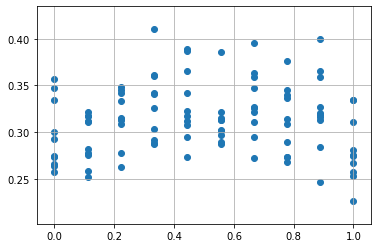

In [ ]:
plt.scatter(df.cooperative, df.Gini)
plt.grid(True)

# Sensitivity analysis (0.5 points)


In [ ]:
from mesa.batchrunner import BatchRunner


fixed_params = {"height": 20, "width": 20, "N": 50} 
variable_parms = {"cooperative": np.linspace(0,1,11), 
                  #"initial_wallet": range(1,5),
                  #"speed_spread": np.linspace(0,1,2),
                  "buyers_proportion": np.linspace(0.1,0.5,10)}

model_reporters = {"Totinformed": compute_informed,
                              "Gini": compute_gini,
                              "Wealth": compute_wealth,
                              "Utility": compute_utility,
                              "Lemons": compute_lemons,
                              "Cars": compute_cars}

param_sweep = BatchRunner(News_Model,
                          variable_parameters=variable_parms, fixed_parameters=fixed_params,
                          iterations=10, 
                          max_steps=200,
                          model_reporters=model_reporters)

param_sweep.run_all()

1000it [10:12,  1.63it/s]


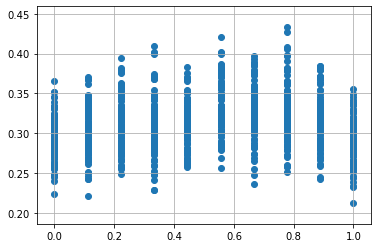

In [ ]:
df = param_sweep.get_model_vars_dataframe()
plt.scatter(df.cooperative, df.Gini)
plt.grid(True)

## Vary the amount of cells.

In [ ]:
from mesa.batchrunner import BatchRunner


fixed_params = {"height": 20, "width": 20, "N": 50, "buyers_proportion": 0.5} 
variable_parms = {"cooperative": np.linspace(0,1,10), 
                  #"initial_wallet": range(1,5),
                  #"speed_spread": np.linspace(0,1,2),
                  #"buyers_proportion": np.linspace(0.1,0.5,10)
                 }

model_reporters = {"Totinformed": compute_informed,
                              "Gini": compute_gini,
                              "Wealth": compute_wealth,
                              "Utility": compute_utility,
                              "Lemons": compute_lemons,
                              "Cars": compute_cars}

param_sweep = BatchRunner(News_Model,
                          variable_parameters=variable_parms, fixed_parameters=fixed_params,
                          iterations=10, 
                          max_steps=200,
                          model_reporters=model_reporters)

param_sweep.run_all()

100it [01:07,  1.49it/s]


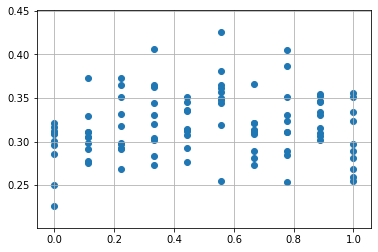

In [ ]:
df = param_sweep.get_model_vars_dataframe()
plt.scatter(df.cooperative, df.Gini)
plt.grid(True)

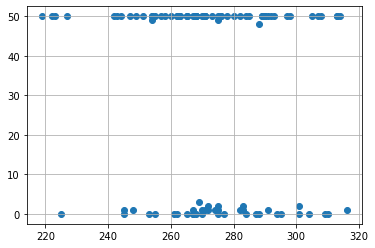

In [ ]:
df = param_sweep.get_model_vars_dataframe()
plt.scatter(df.Wealth, df.Totinformed)
plt.grid(True)

# Discussion and conclusion (0.5 points)


The model presented is a simple model but allows to observe complex relationships between information and inequality in zero-sum economies. The main takeaway of this project is the ability of building complex systems out of simple rules. Out of it, we could observe how the effect of informed individuals in the economy may be disturbing if the information does flow enough. So disturbing that we would prefer agents to behave randomly rather than to take informed actions. However, drawing conclusions out of models like this one need for more robustness checks and contrast against the data. Still, it is a cheap experimental starting point, that allows researchers to test initial hypothesis and spot new ones.
 
In future research, the economy proposed can be enhanced with more type of agents and adding tax authorities that control for the inequality in every step. Also, the agents can be defined with Reinforcement Learning algorithms as proposed by the Salesforce team in its paper the AI Economist, so that they learn given an objective option. Indeed this might arise to interesting dynamics as no trade instead of random trading. An interesting addition would be to merge this information model with the segregation model by Schelling, to understand if maybe wealthy indviduals might only interact among themselves creating positive chambers of eco.

References
Akerlof, G. (1970). The Market for "Lemons": Quality Uncertainty and the Market Mechanism. The Quarterly Journal Of Economics, 84(3), 488. doi: 10.2307/1879431

Eaton, B., & Schelling, T. (1981). Micromotives and Macrobehavior. The Canadian Journal Of Economics, 14(2), 369. doi: 10.2307/134812

Project Mesa. (2021). Retrieved 29 January 2021, from https://github.com/projectmesa

S. Zheng, A. Trott, S. Srinivasa, N. Naik, M. Gruesbeck, D.C. Parkes, R. Socher
The AI Economist: Improving Equality and Productivity with AI-Driven Tax Policies (2020) arXiv preprint arXiv:2004.13332


